Primeras filas del dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Valores nulos por columna:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Estadísticas descriptivas:


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


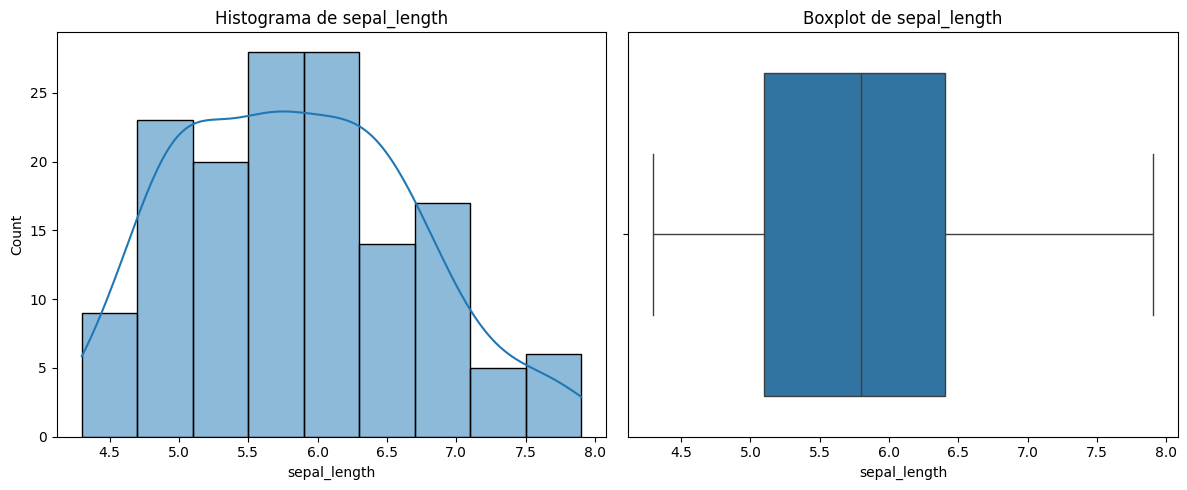

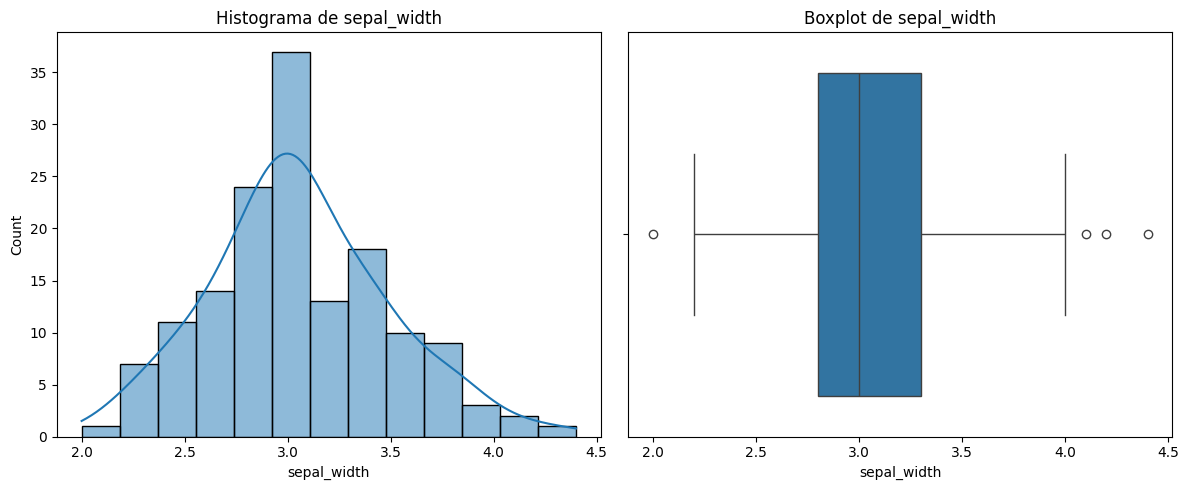

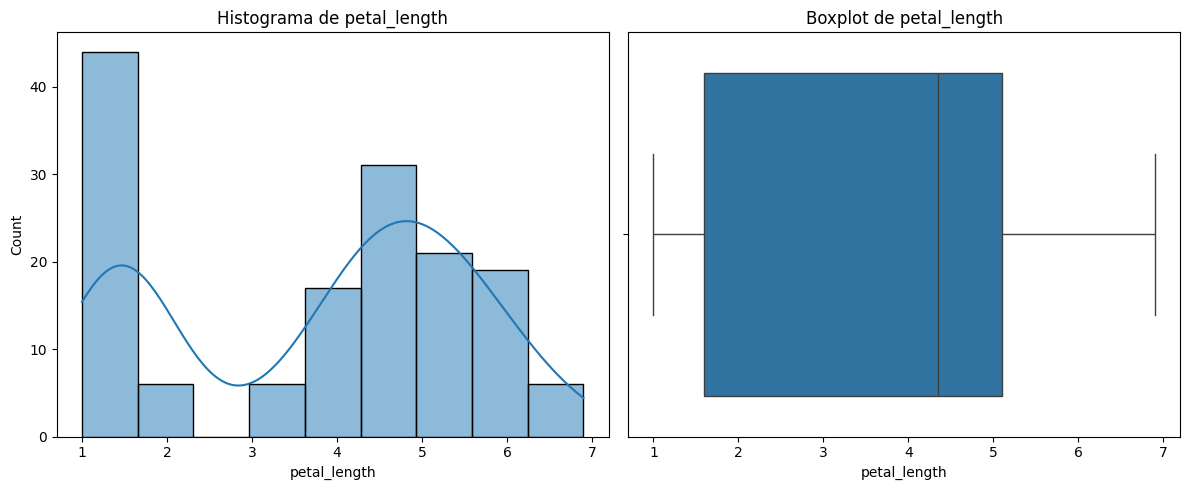

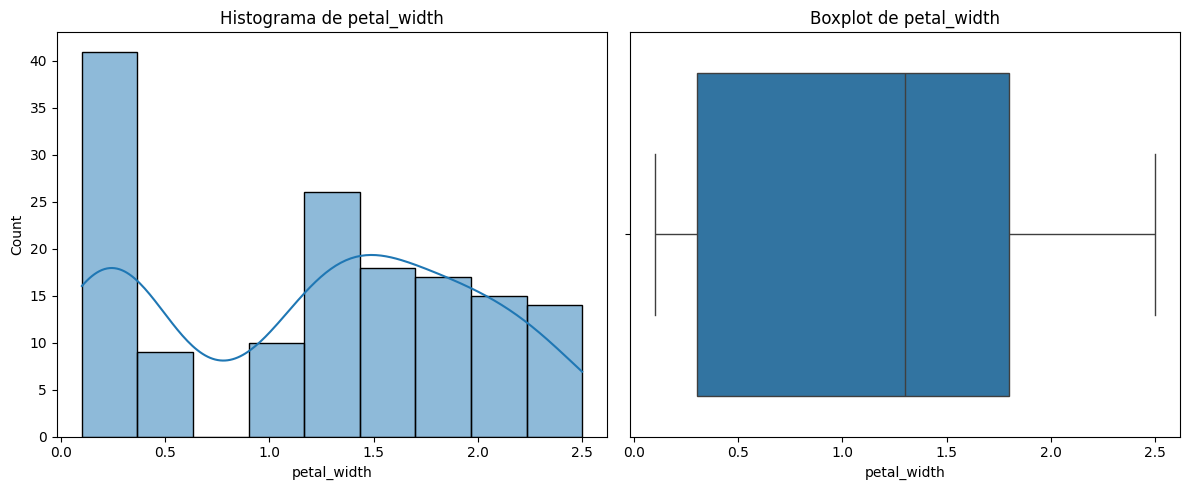


Columna categórica: species
Número de valores únicos: 3
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


/tmp/ipython-input-3532535744.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


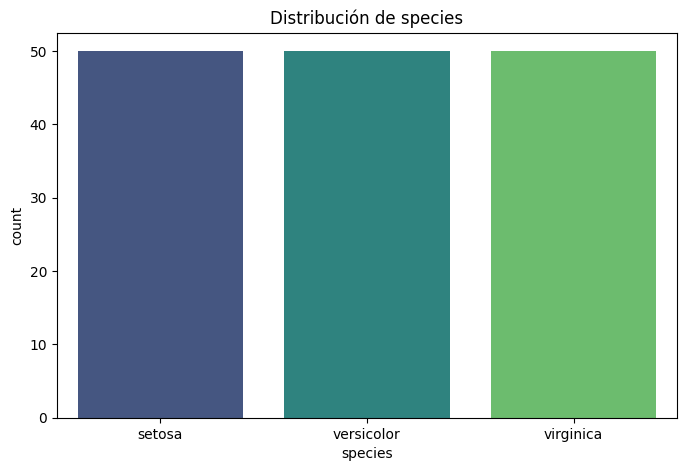

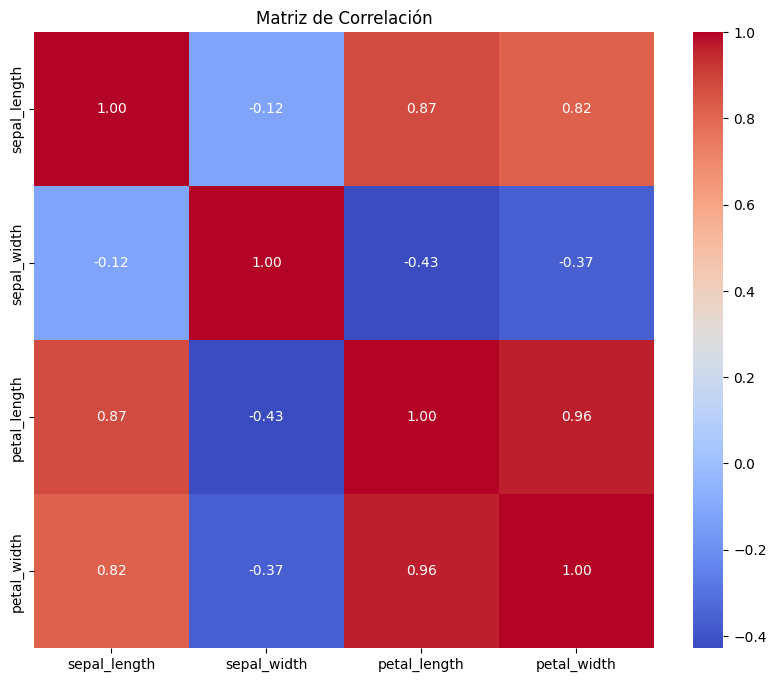

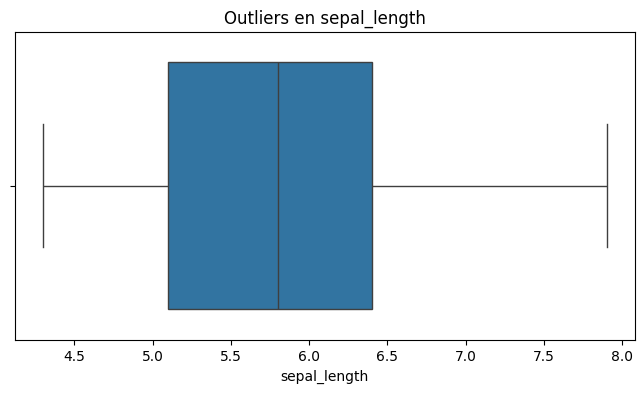

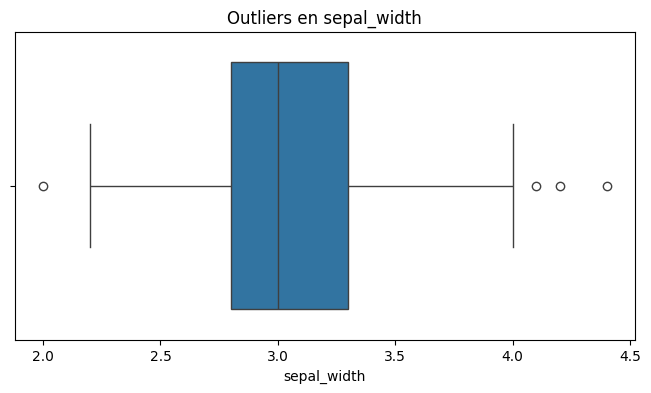

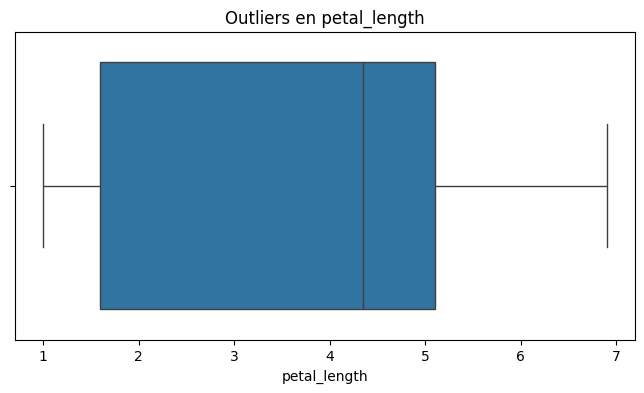

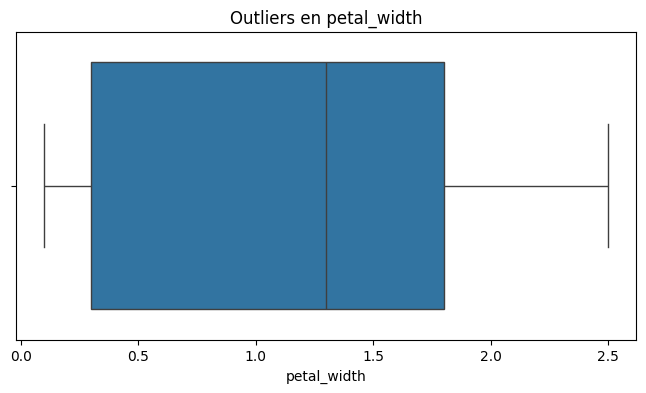

In [1]:
# 1. Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Cargar dataset desde GitHub
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

# ============================
# 3. Información básica
# ============================
print("Primeras filas del dataset:")
display(df.head())

print("\nInformación del dataset:")
print(df.info())

print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nEstadísticas descriptivas:")
display(df.describe(include='all'))

# ============================
# 4. Distribución de variables numéricas
# ============================
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histograma de {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')

    plt.tight_layout()
    plt.show()

# ============================
# 5. Distribución de variables categóricas
# ============================
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\nColumna categórica: {col}")
    print(f"Número de valores únicos: {df[col].nunique()}")
    print(df[col].value_counts())

    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f'Distribución de {col}')
    plt.show()

# ============================
# 6. Matriz de correlación
# ============================
if len(numerical_cols) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Matriz de Correlación')
    plt.show()

# ============================
# 7. Outliers
# ============================
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Outliers en {col}')
    plt.show()
